Analyze state factors

In [6]:
import json
import os
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def scale_length(arr):
    timestep = len(arr)
    
    if timestep == 100:
        return arr
    elif timestep < 100:
        factor = 100 // timestep
        remainder = 100 % timestep
        scaled_arr = []
        for i in range(timestep):
            scaled_arr.extend([arr[i]] * factor)
            if i < remainder:
                scaled_arr.append(arr[i])
        return scaled_arr
    else:
        scaling_factor = timestep / 100
        scaled_arr = [arr[int(i * scaling_factor)] for i in range(100)]
        return scaled_arr

In [3]:
ids = os.listdir("/data/flybyml_dataset_v1/data")

all_obs = []

for id in ids:
    obs = []
    with open(f"/data/flybyml_dataset_v1/data/{id}", "r") as f:
        data = json.load(f)
    
    data = scale_length(data)
    
    for datum in data:
        obs.append(np.array([
            *datum['state']['attitude'][:2], 
            datum['state']['speed'], 
            datum['state']['vertical_speed']
        ]))
    all_obs.append(np.stack(obs, axis=0))
    
all_obs = np.array(all_obs)

print(all_obs.shape)

(49, 100, 4)


In [4]:
all_obs = np.transpose(all_obs, (2, 1, 0)) # (4, 100, 49)
all_obs.shape

(4, 100, 49)

Text(0.5, 1.0, 'pitch distribution over time')

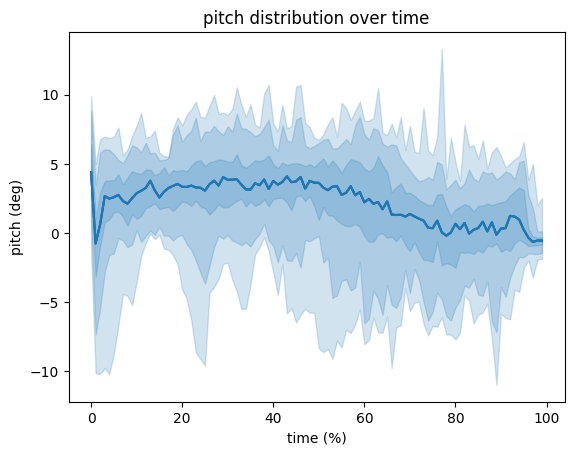

In [11]:
pitch_df = pd.DataFrame({
    'timestep': [num for num in range(100) for _ in range(49)],
    'state': all_obs[0].flatten().tolist()
})

for interval in [50, 90, 98]:
    plot = sns.lineplot(pitch_df, x='timestep', y='state', estimator="median", errorbar=("pi", interval), color="C0")
    
plt.xlabel('time (%)')
plt.ylabel('pitch (deg)')
plt.title('pitch distribution over time')

Text(0.5, 1.0, 'roll distribution over time')

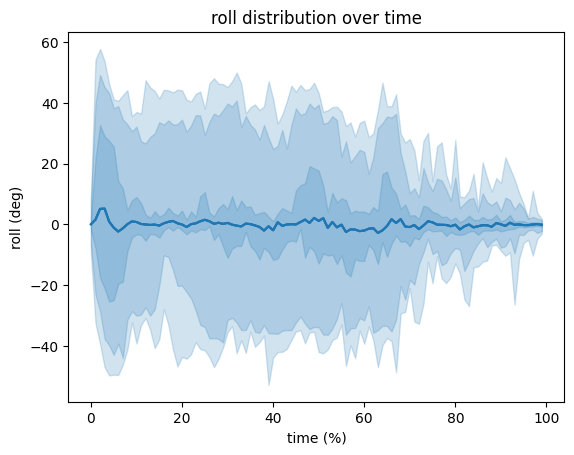

In [12]:
roll_df = pd.DataFrame({
    'timestep': [num for num in range(100) for _ in range(49)],
    'state': all_obs[1].flatten().tolist()
})

for interval in [50, 90, 98]:
    plot = sns.lineplot(roll_df, x='timestep', y='state', estimator="median", errorbar=("pi", interval), color="C0")
    
plt.xlabel('time (%)')
plt.ylabel('roll (deg)')
plt.title('roll distribution over time')

Text(0.5, 1.0, 'speed distribution over time')

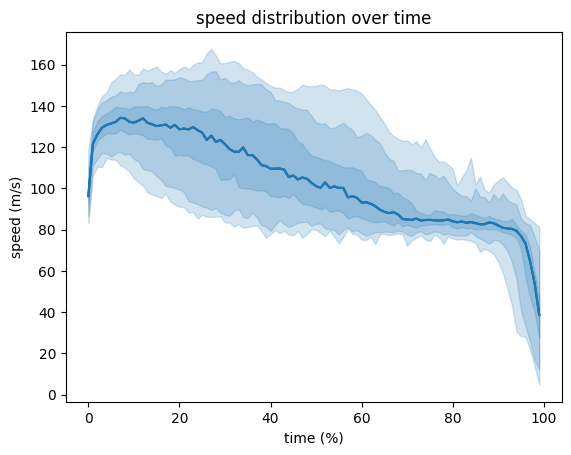

In [14]:
spd_df = pd.DataFrame({
    'timestep': [num for num in range(100) for _ in range(49)],
    'state': all_obs[2].flatten().tolist()
})

for interval in [50, 90, 98]:
    plot = sns.lineplot(spd_df, x='timestep', y='state', estimator="median", errorbar=("pi", interval), color="C0")
    
plt.xlabel('time (%)')
plt.ylabel('speed (m/s)')
plt.title('speed distribution over time')

Text(0.5, 1.0, 'vertical speed distribution over time')

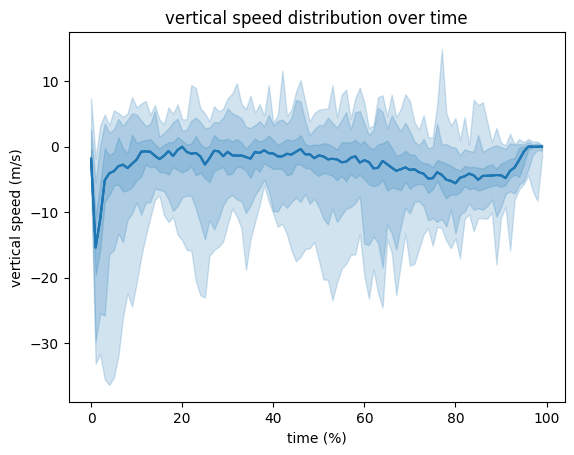

In [15]:
vertspd_df = pd.DataFrame({
    'timestep': [num for num in range(100) for _ in range(49)],
    'state': all_obs[3].flatten().tolist()
})

for interval in [50, 90, 98]:
    plot = sns.lineplot(vertspd_df, x='timestep', y='state', estimator="median", errorbar=("pi", interval), color="C0")
    
plt.xlabel('time (%)')
plt.ylabel('vertical speed (m/s)')
plt.title('vertical speed distribution over time')